In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import parallel_plume_sim as pps

In [2]:
dir='~/DataAnalysis/data/puff_data/'

In [3]:
dir_odor='~/DataAnalysis/data/Sprints/HighRes/'

In [4]:
# t=pd.read_hdf(dir_odor+'NotWindy/NotWindyMASigned.h5')
t=pd.read_hdf(dir_odor+'Windy/WindyMASigned.h5')

In [22]:
t1 = t[(t['xsrc'] >= -10) & (t['xsrc'] <= 10) & (t['ysrc'] >= -10) & (t['ysrc'] <= 10)]
t1=t1.reset_index()

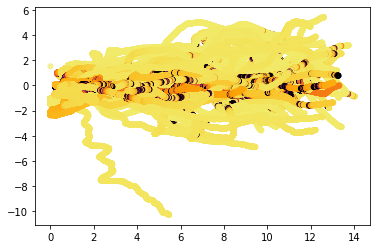

In [23]:
plt.scatter(t1.distance_from_source_a*t1.xsign,
            t1.nearest_from_streakline*t1.ysign,
            c=t1.odor, cmap="inferno_r",
            edgecolors='none', alpha=0.7, vmin=0, vmax=10)

In [24]:
# df=pd.read_hdf(dir+'puff_data_wc.h5')

In [25]:
puff_data_filename = '~/DataAnalysis/data/puff_data/puff_data_20230123_131923.pickle'

In [21]:
# how many seconds to include per chunk?
max_time = 4 

# maximum distance in x and y to consider puffs before ignoring them?
min_x = -10
max_x = 10
min_y = -10
max_y = 10

pps.read_puff_data.split_puff_data_into_smaller_dataframes_and_cull_old_puffs(puff_data_filename, 
                                                                              max_time, 
                                                                              min_x, max_x, 
                                                                              min_y, max_y)



In [26]:
# This should match your directory name from above -- you need to change this
dirname = '/home/gadfly/DataAnalysis/data/puff_data/puff_data_20230123_131923'
# Class for reading puff data
puff_reader = pps.read_puff_data.PuffReader(dirname)

In [28]:
c=[]
wx=[]
wy=[]
df_new=pd.DataFrame()

for i in range(len(t)):
    concentration, wind_x, wind_y=puff_reader.get_odor_concentration_at_t_and_position(t1.time[i], 
                                                                                       t1.xsrc[i], t1.ysrc[i])
    c.append(concentration)
    wx.append(wind_x)
    wy.append(wind_y)

In [50]:
df_new['odor_sim']=c
df_new['windx']=wx
df_new['windy']=wy
df_new['xsrc']=t.xsrc
df_new['ysrc']=t.ysrc

In [35]:
t=np.arange(0,100,0.0001)
np.random.seed(42)
x=np.random.uniform(-4, 4, size=len(t))
y=np.random.uniform(-8, 8, size=len(t))

In [36]:
df=pd.DataFrame()
df['time']=t
df['x']=x
df['y']=y

In [39]:
c=[]
wx=[]
wy=[]
for i in range(len(df)):
    concentration, wind_x, wind_y=puff_reader.get_odor_concentration_at_t_and_position(df.time[i], df.x[i], df.y[i])
    c.append(concentration)
    wx.append(wind_x)
    wy.append(wind_y)
    
df['odor']=c
df['windx']=wx
df['windy']=wy